# <font color='Blue'>Machine Learning - Supervised Machine Learning - SVM</font>

## <font color='Blue'>Learning Objectives</font>

    1. Understand SVMs
    2. Learn to Implement Linear SVMs
    3. Learn to Implement Non-linear SVMs
    4. Tune SVMs

<b> Reference and code: Chapter 17 - SVM : Machine Learning with Python - Chris Albon </b>

## <font color='Blue'>Support Vector Machines</font>

### <font color='Blue'>Basics</font>

Support Vector Machines (SVM) are a family of separation methods for classification. SVMs use the 	concept of decision boundaries to demarcate objects into different classes.  

### <font color='Blue'>Decision Boundary</font>
Decision boundary is a separator that can demarcate the objects into different classes. The decision 	boundaries are a function of the attributes, or in otherwords features of the object to be classified. The 	decision boundary can be a line or a plane.

### <font color='Blue'>Decision Boundary - Lines and Planes </font>

<img src="SVM_1.jpg" width="600" height="800" >

### <font color='Blue'>The Hyperplane </font>

To understand support vector machines, we must understand hyperplanes. Formally, a hyperplane is an n – 1 subspace in an n-dimensional space. While that sounds complex, it actually is pretty simple. For example, if we wanted to divide a twodimensional space, we’d use a one-dimensional hyperplane (i.e., a line). If we wanted to divide a three-dimensional space, we’d use a two-dimensional hyperplane (i.e., a flat piece of paper or a bed sheet). A hyperplane is simply a generalization of that concept
into n dimensions.

### <font color='Blue'>The Problem to be solved : Finding the Optimal Hyperplane </font>

Let us look at the decision boundaries in the figure closely. We notice that we can have several decision boundaries. Given several feasible decision boundaries, the problem is to identify the decision boundary that maximizes the separation between two classes.

<img src="SVM_2.jpg" width="600" height="800" >

Figure 2 shows two possible decision boundaries. So which one to choose? Intuitively, Choose the decision boundary that achieves the maximum separation.	

### <font color='Blue'>Some Terminologies </font>

<img src="SVM_3.jpg" width="600" height="800" >

### <font color='Blue'>What is a support Vector ?</font>

Support vectors are the data points that lie closest to the decision surface (or hyperplane). They are the data points most difficult to classify.  They have direct bearing on the optimum location of the decision surface. 

Support vectors are the elements of the training set that would change the position of the dividing hyperplane if removed. 

The problem of finding the optimal hyper plane is an optimization problem and can be solved by optimization techniques 

<img src="SVM_4.jpg" width="500" height="600" >

### <font color='Blue'>Non Linear Decision Boundaries</font>

<img src="SVM_5.jpg" width="500" height="600" >

### <font color='Blue'>Non Linear SVMs</font>

Data may not be always linearly separable. In such cases, we use Non-linear SVMs. Non-linear SVMs use kernel functions (sometime referred to as kernel tricks) to map the data into a higher-dimensional space. Doing so, aids linear transformation. Broad idea is shown in following figure.


<img src="SVM_6.jpg" width="500" height="600" >

### <font color='Blue'>Non Linear SVMs – Kernel Function : Polynomial Kernel </font>

Data may not be always linearly separable. In such cases, we use Non-linear SVMs. Non-linear SVMs use kernel functions (sometime referred to as kernel tricks) to map the data into a higher-dimensional space. Doing so, aids linear transformation. Broad idea is shown in following figure.


<img src="SVM_7.jpg" width="600" height="800" >

### <font color='Blue'>Non Linear SVMs – Kernel Function : RBF Kernel </font>

<img src="SVM_8.jpg" width="600" height="800" >

### <font color='Blue'>Hyperparameters: Cost </font>

This refers to the cost or the penalty of misclassification. Often times it is desirable to specifically allow some training points to be misclassified in order to have an "overall better" position of the separating hyperplane.  Really depends on the data to be predicted.

<img src="SVM_9.jpg" width="400" height="600" >

### <font color='Blue'>Hyperparameters:Gamma (Applicable for RBF Kernel) </font>

Intuitively, the gamma parameter defines how closely the kernel can fit the data.  Low gamma may result in a generic model (too simplistic) and high gamma may result in a very complex model, leading to overfitting.

<img src="SVM_10.jpg" width="800" height="1000" >

### <font color='Blue'>Hyperparameters: Degree (Applicable for Polynomial Kernel) </font>

Intuitively, the gamma parameter defines how closely the kernel can fit the data.  Low gamma may result in a generic model (too simplistic) and high gamma may result in a very complex model, leading to overfitting.

<img src="SVM_11.jpg" width="800" height="1000" >

### <font color='Blue'>Hyperparameters: Tuning </font>

Packages allow us to do grid search and find the optimum C, Degree and Gamma

For illustrations on the effect of “C” and “Gamma”, see
https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

### <font color='Blue'>Summary</font>

<b> Pros </b>
    
    Quite useful when dimensions are high
    Quite useful when the number of dimensions is more than the sample
    Works with a variety of kernels [25 known kernels]
    Resistant to Overfitting

<b> Cons </b>

    Not suitable for large datasets
    Not suitable when target classes are overlapping 
    Not suitable for noisy data

### <font color='Blue'>Additional Illustrations</font>

<img src="SVM_12.png" width="1000" height="1200" >
<img src="SVM_13.jpg" width="600" height="800" >

### <font color='Blue'>SVM Application</font>

### <font color='Blue'>1.0 Loading Libraries</font>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sn
sn.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

### <font color='Blue'>1.1 ROC Function</font>

In [3]:
# RoC Curve

# RoC Curve can be used to understand the overall performance of a logistic regression model and used for model selection
# RoC Curve is a plot between False positive rate [FP / (TN + FP)] and True positive rate [TP / (TP+FN)]
# Higher the AUC, better the model
# AUC < 0.5 model is inferior to a case of having no model
# AUC > 0.7 model is useful

def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

### <font color='Blue'>1.2 Linear SVM</font>

Problem: You need to train a model to classify observations.
Solution: Use a support vector classifier (SVC) to find the hyperplane that maximizes the margins between the classes:

### <font color='Blue'>1.3 Loading Data</font>

    Load data with only two classes and two features
    Target - contains two classes 0 and 1

In [4]:
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### <font color='Blue'>1.4 Standardizing Features</font>

Features contains two features (showing 10 features)

In [5]:
features[:10]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

### <font color='Blue'>1.5 Creating SVC</font>

scikit-learn’s LinearSVC implements a simple SVC. To get an intuition behind what an SVC is doing, let us plot out the data and hyperplane. While SVCs work well in high dimensions, in our solution we only loaded two features and took a subset of observations so that the data contains only two classes. This will let us visualize the model.

Recall that SVC attempts to find the hyperplane—a line when we only have two dimensions—with the maximum margin between the classes. In the following code we plot the two classes on a two-dimensional space, then draw the hyperplane

In [6]:
svc = LinearSVC(C=1.0)
model = svc.fit(features_standardized, target)

### <font color='Blue'>1.6 Plotting data along with hyperplane </font>

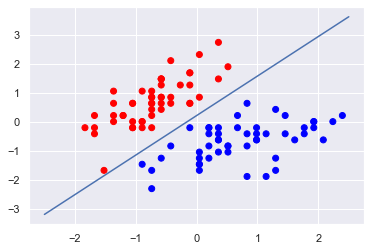

In [7]:
# Plotting data along with hyperplane

# Plot data points and color using their class
color = ["red" if c == 0 else "blue" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color);

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy);

In this visualization, all observations of class 0 are black and observations of class 1 are light gray. The hyperplane is the decision boundary deciding how new observations are classified. Specifically, any observation above the line will by classified as class 0 while any observation below the line will be classified as class 1. We can prove this by creating a new observation in the top-left corner of our visualization, meaning it should be predicted to be class 0:

### <font color='Blue'>1.7 Predict Class of New Observation </font>

In [8]:
# Create new observation
new_observation = [[ 0, -3]]
# Predict class of new observation
svc.predict(new_observation)

array([1])

<b> Note: </b> <br>
There are a few things to note about SVCs. First, for the sake of visualization we limited our example to a binary example (e.g., only two classes); however, SVCs can work well with multiple classes. Second, as our visualization shows, the hyperplane is by definition linear (i.e., not curved). This was okay in this example because the data was linearly separable, meaning there was a hyperplane that could perfectly separate the two classes. Unfortunately, in the real world this will rarely be the case.

<b> Role of Penalty: </b> <br>
More typically, we will not be able to perfectly separate classes. In these situations there is a balance between SVC maximizing the margin of the hyperplane and minimizing the misclassification. In SVC, the latter is controlled with the hyperparameter C, the penalty imposed on errors. 

C is a parameter of the SVC learner and is the penalty for misclassifying a data point. 
When C is small, the classifier is okay with misclassified data points (high bias but low variance). 
When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards to avoid
any misclassified data points (low bias but high variance).

High bias - reasonable performance in training, Low Variance - reasonable performance in testing
Low  bias - good performance in training, High Variance - less than reasonable performance in testing

In scikit-learn, C is determined by the parameter C and defaults to C=1.0. 
We should treat C has a hyperparameter of our learning algorithm

In the step svc = LinearSVC(C=1.0) above, set c=0.0001 and see what happens?
Think what could be its impact

### <font color='Blue'>2.0 Non-Linear SVMs </font>

<b> Problem: </b> You need to train a support vector classifier, but your classes are linearly inseparable. <br>
<b> Solution: </b> Train an extension of a support vector machine using kernel functions to create nonlinear decision boundaries. <br>

<b> Kernel: </b>
The non-linear decision boundaries are created by using non-linear kernels. <br>
Kernel determines the type of hyperplane used to separate our classes and we create different hyperplanes by using different kernels. Some non-linear kernels are rbf kernel and polynomial kernel.

### <font color='Blue'>2.1 Let us experiment with a data set </font>

In [9]:
# Creating non-linearly separable data

# Set randomization seed
np.random.seed(0)

# Generate two features
features = np.random.randn(200, 2)

# Use a XOR gate (you don't need to know what this is) to generate # linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [10]:
# Let us define some functions for visualization

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker="+", label=cl)

### <font color='Blue'>2.1 A Linear SVMs for reference</font>

In [11]:
svc_linear = SVC(kernel="linear", random_state=0, C=1)

In [12]:
# Train model

svc_linear.fit(features, target)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)

SVC(C=1, gamma='auto', kernel='linear', random_state=0)

### <font color='Blue'>2.2 Visualize the output</font>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


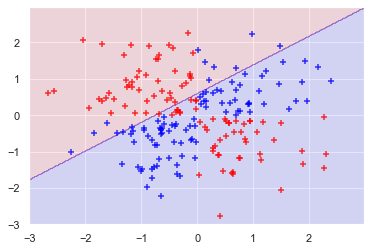

In [13]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc_linear);

<b> As we can see, our linear hyperplane did very poorly at dividing the two classes! Now, let’s swap out the linear kernel with a radial basis function kernel and use it to train a new model. </b>

### <font color='Blue'>2.3 A Non-Linear SVM</font>

In [14]:
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)

### <font color='Blue'>2.4 Visualize the output</font>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


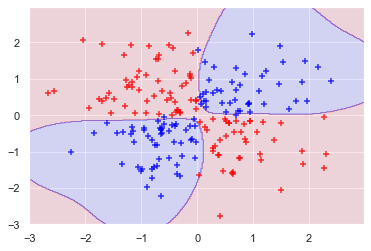

In [15]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc);

<b> By using the radial basis function kernel we could create a decision boundary able to do a much better job of separating the two classes than the linear kernel. This is the motivation behind using kernels in support vector machines. </b>

### <font color='Blue'>3.0 Multi-Class SVM</font>

In the following illustration, we shall see a simple example of extracting probabilities for different classes.

The dataset is iris. It has four features and three classes

In [16]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# Create new observation
new_observation = [[.4, .4, .4, .4]]

# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

### <font color='Blue'>4.0 Micro-mortage analysis Case</font>

Let us apply SVMs = Linear, RBF and Polynomial Kernel to a real-life data

We shall also tune the SVM parameters

### <font color='Blue'>4.1 Micro-mortage analysis Background</font>

Business wants to manage its 

    (a) risk in micro-mortgage loans
    (b) to lower the cost of micro-mortgage loans
    (c) adopt differential pricing for loans
  
In order to achieve its objectives, business needs to accurately predict whether a prospective borrower should be given a loan or not. Business has historical data which it can use for this purpose. The data contains the demographic, economic and social characteristics of borrowers along with loan repayment status (repaid or defaulted). Using SVM, we can build models that use the characteristics of prospective borrowers and obtain the probability of they repaying the loan. 

### <font color='Blue'>4.2 Data Understanding</font>

### <font color='Blue'>4.3 Data Preparation</font>

In [17]:
credit_df = pd.read_excel( "cleaned.xlsx",sheet_name='cleaned')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2223 non-null   object 
 1   Decision         2223 non-null   int64  
 2   Selfcon_Code     2223 non-null   int64  
 3   Tier_1           2223 non-null   int64  
 4   Tier_2           2223 non-null   int64  
 5   AccoClass        2223 non-null   int64  
 6   LoanType         2223 non-null   int64  
 7   Gender           2223 non-null   int64  
 8   Etype            2223 non-null   int64  
 9   Doc_prf          2223 non-null   int64  
 10  Marstat          2223 non-null   int64  
 11  Emp_Type_1       2223 non-null   int64  
 12  Emp_Type_2       2223 non-null   int64  
 13  Emp_Type_3       2223 non-null   int64  
 14  Educlass_1       2223 non-null   int64  
 15  Educlass_2       2223 non-null   int64  
 16  Oriclass_1       2223 non-null   int64  
 17  Oriclass_2    

### <font color='Blue'>4.3 Data Preparation - Categorical Variables</font>

In [18]:
credit_df.iloc[0:5,0:14]
# Data is already dummy coded

,ID,Decision,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_prf,Marstat,Emp_Type_1,Emp_Type_2,Emp_Type_3
0,AJM-39R8-519413,0,1,0,0,0,1,0,1,0,1,1,0,0
1,AJM-3A3Z-876970,0,1,0,0,0,1,0,0,1,1,0,0,0
2,AJM-7427-952085,1,1,0,0,0,0,0,1,1,1,0,0,0
3,AJM-8ZTZ-979040,1,1,0,0,1,1,0,1,1,1,1,0,0
4,AJM-9SP2-614810,1,1,0,0,0,1,0,1,1,1,1,0,0


### <font color='Blue'>4.4 Class Distribution</font>

In [19]:
# Examine Class distribution
# Decision variable stands for "Sanction" or "Reject"

credit_df.Decision.value_counts()

# Decision = 1 - Sanction
# Decision = 0 - Reject
# Inference: 80% of borrowers have repaid the loan

1    1792
0     431
Name: Decision, dtype: int64

### <font color='Blue'>4.5 Feature Extraction</font>

In [20]:
# Extract relevant predictors
# Notice that we have several derived variables and transformed variables (see data understanding step). We would not need 
# Original variables after they are transformed.
# So let us segregate predictors which would be used for classification

X_features = list( credit_df.columns )
len(X_features)

# Some values can be removed as they are either not required or captured in another variable
unwanted = ['ID','Decision','Expen','TotInc','DispInc','OldEmi','OldEmi_d', 'OldEmi_s','BankSave_d','LoanReq','MarVal','BankSave','Dwnpay',
            'CalcEmi','IIR','IAR','FOIR','dwnp_prop']
X_features = [ele for ele in X_features if ele not in unwanted] 
len(X_features)

X = credit_df[X_features]

# We have 31 predictors

# Extract predicted variable
Y = credit_df.Decision

### <font color='Blue'>4.6 Standardize Predictors</font>

In [21]:
X = scaler.fit_transform(X)

### <font color='Blue'>4.7 Split into Train and Test Data</font>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

### <font color='Blue'>4.8 Model Building: Linear and Evaluation</font>

### <font color='Blue'>4.8.1 Linear Model</font>

In [23]:
svc_linear_m = SVC(kernel="linear", random_state=0, C=1,probability=True)
svc_linear_model = svc_linear_m.fit(X_train, y_train)

### <font color='Blue'>4.8.2 Extracting Probabilities</font>

In [24]:
pred_prob = pd.DataFrame(svc_linear_model.predict_proba(X_test))[1]
actual    = y_test.to_numpy()
y_pred_df = pd.DataFrame( { "actual": actual, 
                            "predicted_prob":pred_prob 
                          } )

### <font color='Blue'>4.8.3 Classifier Performance</font>

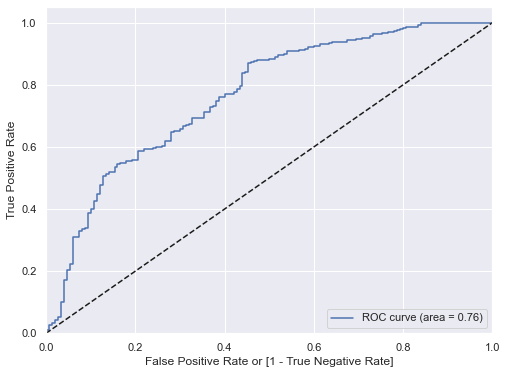

0.7645003223726627

In [25]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc(  y_pred_df.actual, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)

### <font color='Blue'>4.8.4 Plotting Distributions and Identifying optimal probability</font>

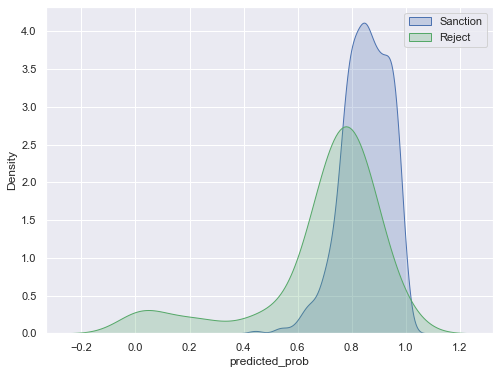

In [26]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>4.8.5 Confusion Matrix and Performance Measure</font>

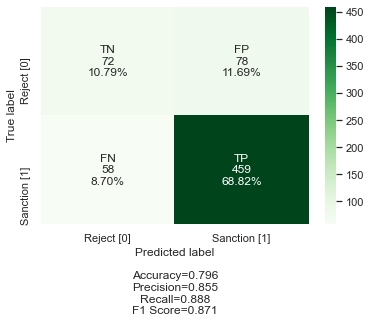

In [27]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.75 else 0)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [28]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       150
           1       0.85      0.89      0.87       517

    accuracy                           0.80       667
   macro avg       0.70      0.68      0.69       667
weighted avg       0.79      0.80      0.79       667



### <font color='Blue'>5.0 Non-Linear SVM: RBF Kernel</font>

In [29]:
svc_nlinear_rbf      = SVC(kernel="rbf", random_state=0,  gamma="auto", C=1, probability=True)
svc_nlinear_rbfmodel = svc_nlinear_rbf.fit(X_train, y_train)

### <font color='Blue'>5.1 Extracting Probabilities</font>

In [30]:
pred_prob = pd.DataFrame(svc_nlinear_rbfmodel.predict_proba(X_test))[1]
actual    = y_test.to_numpy()
y_pred_df = pd.DataFrame( { "actual": actual, 
                            "predicted_prob":pred_prob 
                          } )

In [31]:
y_pred_df.head(5)

,actual,predicted_prob
0,1,0.892808
1,1,0.958463
2,1,0.916244
3,1,0.941260
4,0,0.759700


### <font color='Blue'>5.2 Classifier Performance</font>

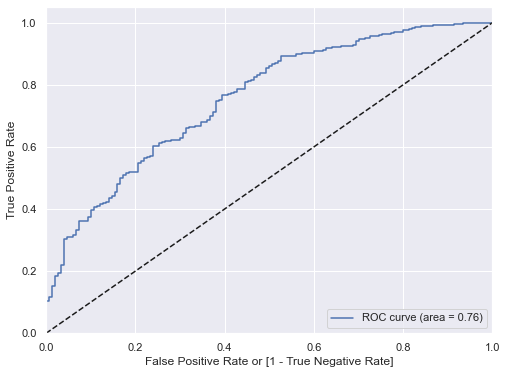

0.7559252095422309

In [32]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc(  y_pred_df.actual, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)

### <font color='Blue'>5.3 Plotting Distributions and Identifying optimal probability</font>

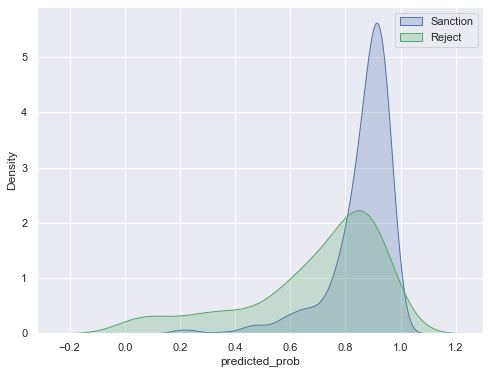

In [33]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>5.4 Confusion Matrix and Performance Measure</font>

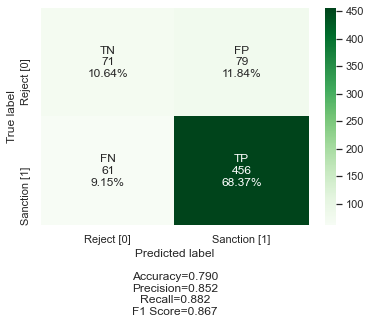

In [34]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.75 else 0)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [35]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.54      0.47      0.50       150
           1       0.85      0.88      0.87       517

    accuracy                           0.79       667
   macro avg       0.70      0.68      0.69       667
weighted avg       0.78      0.79      0.79       667



### <font color='Blue'>6.0 Non-Linear SVM: Polynomial Kernel</font>

In [36]:
svc_nlinear_poly      = SVC(kernel="poly", random_state=0,  degree=2, C=1, probability=True)
svc_nlinear_polymodel = svc_nlinear_poly.fit(X_train, y_train)

### <font color='Blue'>6.1 Extracting Probabilities</font>

In [37]:
pred_prob = pd.DataFrame(svc_nlinear_polymodel.predict_proba(X_test))[1]
actual    = y_test.to_numpy()
y_pred_df = pd.DataFrame( { "actual": actual, 
                            "predicted_prob":pred_prob 
                          } )

### <font color='Blue'>6.2 Classifier Performance</font>

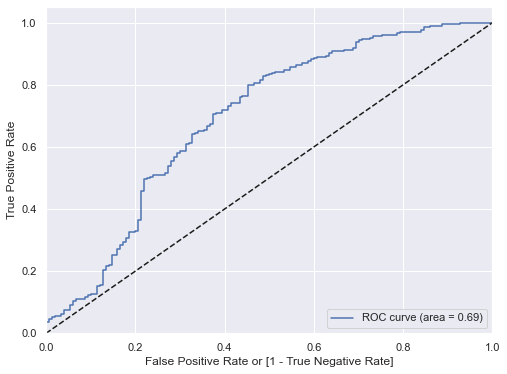

0.6939007092198581

In [38]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc(  y_pred_df.actual, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)

### <font color='Blue'>6.3 Plotting Distributions and Identifying optimal probability</font>

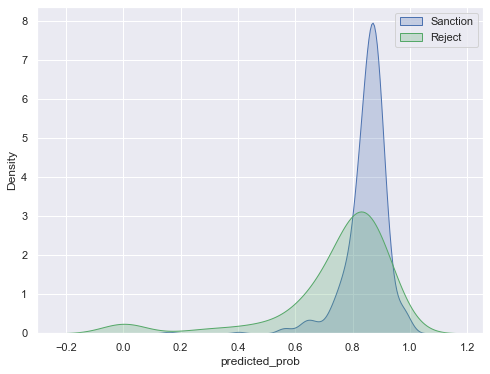

In [39]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>6.4 Confusion Matrix and Performance Measure</font>

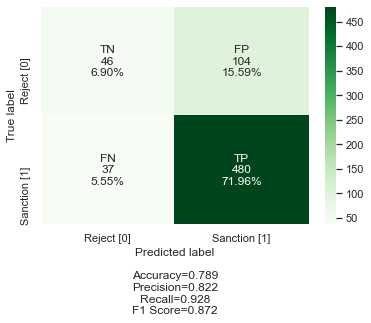

In [40]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.75 else 0)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [41]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.55      0.31      0.39       150
           1       0.82      0.93      0.87       517

    accuracy                           0.79       667
   macro avg       0.69      0.62      0.63       667
weighted avg       0.76      0.79      0.76       667



### <font color='Blue'>7.0 Non-Linear SVM: Sigmoid Kernel</font>

In [42]:
svc_nlinear_sig      = SVC(kernel="sigmoid", random_state=0,  C=1, probability=True)
svc_nlinear_sigmodel = svc_nlinear_sig.fit(X_train, y_train)

### <font color='Blue'>7.1 Extracting Probabilities</font>

In [43]:
pred_prob = pd.DataFrame(svc_nlinear_sigmodel.predict_proba(X_test))[1]
actual    = y_test.to_numpy()
y_pred_df = pd.DataFrame( { "actual": actual, 
                            "predicted_prob":pred_prob 
                          } )

### <font color='Blue'>7.2 Classifier Performance</font>

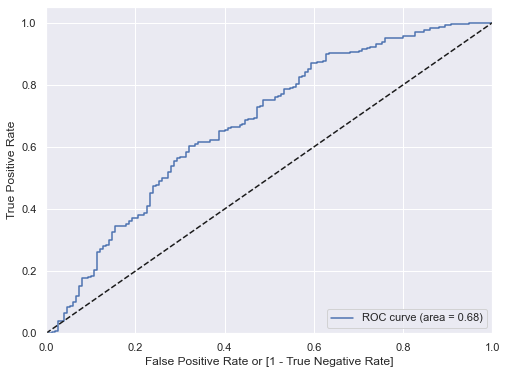

0.6753965183752417

In [44]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)

### <font color='Blue'>7.3 Plotting Distributions and Identifying optimal probability</font>

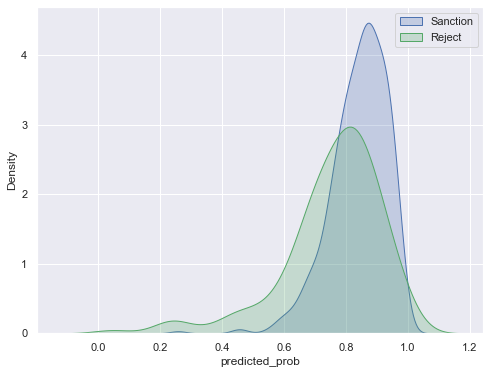

In [45]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>7.4 Confusion Matrix and Performance Measure</font>

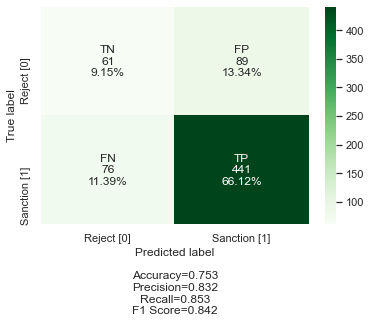

In [46]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.75 else 0)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [47]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       150
           1       0.83      0.85      0.84       517

    accuracy                           0.75       667
   macro avg       0.64      0.63      0.63       667
weighted avg       0.75      0.75      0.75       667



### <font color='Blue'>7.5 Performance Comparison</font>

    Linear SVM                  : AUC - 0.764
    Non-Linear SVM, RBF Kernel  : AUC - 0.756
    Non-Linear SVM, Poly Kernel : AUC - 0.693
    Non-Linear SVM, Sig Kernel  : AUC - 0.675       

### <font color='Blue'>8.0 Parameter Tuning</font>

In [48]:
from sklearn.model_selection import GridSearchCV 

### <font color='Blue'>8.1 Define Parameter Grid</font>

In [49]:
param_grid = {'C': [0.1, 1, 10, 100, 500, 1000],  
              'gamma': [10,5,1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','rbf','poly','sigmoid'],
              'degree': [2,4,6]} 

### <font color='Blue'>8.2 Executing Grid Search</font>

In [50]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=10,cv=2) 
grid.fit(X_train, y_train)

Fitting 2 folds for each of 504 candidates, totalling 1008 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=10,
             param_grid={'C': [0.1, 1, 10, 100, 500, 1000], 'degree': [2, 4, 6],
                         'gamma': [10, 5, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

### <font color='Blue'>8.3 Print best parameter after tuning </font>

In [56]:
print(grid.best_params_)
# {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}

{'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}


In [57]:
print(grid.best_estimator_) 
# SVC(C=100, degree=2, gamma=0.001)

SVC(C=100, degree=2, gamma=0.001)


### <font color='Blue'>8.4 Re-Building Non_Linear Model - RBF Kernel </font>

In [88]:
svc_nlinear_rbf      = SVC(kernel="rbf", random_state=0,  gamma=0.001, C=100, probability=True)
svc_nlinear_rbfmodel = svc_nlinear_rbf.fit(X_train, y_train)

### <font color='Blue'>8.5 Extracting Probabilities </font>

In [59]:
pred_prob = pd.DataFrame(svc_nlinear_rbfmodel.predict_proba(X_test))[1]
actual    = y_test.to_numpy()
y_pred_df = pd.DataFrame( { "actual": actual, 
                            "predicted_prob":pred_prob 
                          } )

### <font color='Blue'>8.6 Classifier Performance </font>

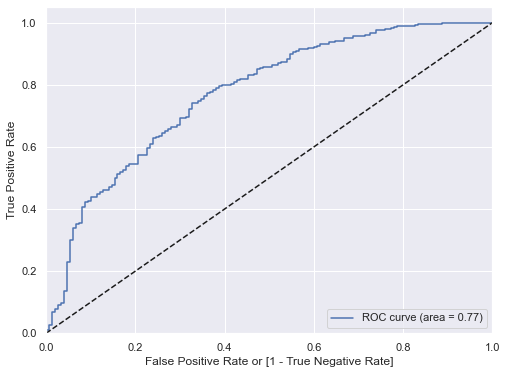

0.7710251450676983

In [60]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc(  y_pred_df.actual, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)

### <font color='Blue'>8.7 Summary of Classifier Performance </font>

    Non-Linear SVM, RBF Kernel : AUC - 0.771 
    Linear SVM                 : AUC - 0.764 
    Non-Linear SVM, RBF Kernel : AUC - 0.764 
    Non-Linear SVM, RBF Kernel : AUC - 0.693 
    Non-Linear SVM, RBF Kernel : AUC - 0.675  
    Logistic Regression        : AUC - 0.770  
    CART                       : AUC - 0.717  
    N-Bayes                    : AUC - 0.719 